# Iris Dataset

In [124]:
# For preprocessing and Visualization: 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For trying many technickes to choose the best of them:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# For dissimilarity matrix
from sklearn.metrics import pairwise_distances

import warnings
warnings.filterwarnings("ignore")

# Loading the data

In [125]:
df = pd.read_csv(r"D:\My Learning\Iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


# Some insights about the data

In [126]:
df = df.drop('Id', axis=1)

In [127]:
print(f"There is a {df.shape[0]} rows and {df.shape[1]} columns in the dataset")

There is a 150 rows and 5 columns in the dataset


In [128]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


-> There is no outliers.

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


**Observations:**
- There is no null values.
- There is no problem with data types.

In [130]:
df.duplicated().sum()

3

There is some dublicate data

In [28]:
# Removing The duplicates
df.drop_duplicates(inplace = True)
df.duplicated().sum()

0

In [132]:
# Number of unique species
df["Species"].nunique()

3

In [131]:
# Represent The unique value
df["Species"].unique().tolist()

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

In [38]:
for i in list(df.columns):
    print("\n------", i, "------\n")
    print("\n", df[i].value_counts())
    print("\n", df[i].describe())


------ SepalLengthCm ------


 SepalLengthCm
5.0    10
5.1     9
6.3     9
6.7     8
5.7     8
5.5     7
6.4     7
5.8     6
5.4     6
6.1     6
6.0     6
5.6     6
4.8     5
6.5     5
4.9     4
6.2     4
7.7     4
6.9     4
4.6     4
5.2     4
5.9     3
4.4     3
7.2     3
6.8     3
6.6     2
4.7     2
7.6     1
7.4     1
7.3     1
7.0     1
7.1     1
5.3     1
4.3     1
4.5     1
7.9     1
Name: count, dtype: int64

 count    147.000000
mean       5.856463
std        0.829100
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: SepalLengthCm, dtype: float64

------ SepalWidthCm ------


 SepalWidthCm
3.0    26
2.8    14
3.2    13
3.4    12
3.1    10
2.9    10
2.5     8
2.7     8
3.5     6
3.3     6
3.8     6
2.6     5
2.3     4
3.7     3
2.4     3
2.2     3
3.6     3
3.9     2
4.4     1
4.0     1
4.1     1
4.2     1
2.0     1
Name: count, dtype: int64

 count    147.000000
mean       3.055782
std        0.437009
min        2.00000

- The data seems to be alright (No Wrong values).
- The species column is a balanced class.

In [43]:
Numeric_data = df.drop("Species", axis = 1)
Numeric_data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


### Correlation between columns

In [92]:
Numeric_data.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109321,0.871305,0.817058
SepalWidthCm,-0.109321,1.000000,-0.421057,-0.356376
PetalLengthCm,0.871305,-0.421057,1.000000,0.961883
PetalWidthCm,0.817058,-0.356376,0.961883,1.000000


# Visualization

([<matplotlib.patches.Wedge at 0x299ba7302d0>,
 [Text(0.5295169895422336, 0.9641637608757809, 'Iris-versicolor'),
  Text(-1.0989953336498821, -0.04700272987587277, 'Iris-virginica'),
  Text(0.5702318449125436, -0.9406570273206047, 'Iris-setosa')],
 [Text(0.2888274488412183, 0.5259075059322441, '34.014%'),
  Text(-0.599452000172663, -0.025637852659566963, '33.333%'),
  Text(0.3110355517704783, -0.5130856512657843, '32.653%')])

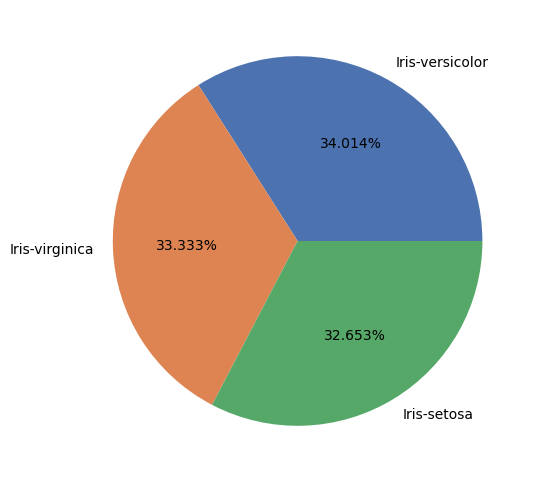

In [70]:
plt.figure(figsize= (12, 6))
plt.pie(df["Species"].value_counts(), labels= df_species.index, colors= sns.color_palette("deep"), autopct = "%0.3f%%")

-> The data is balanced.

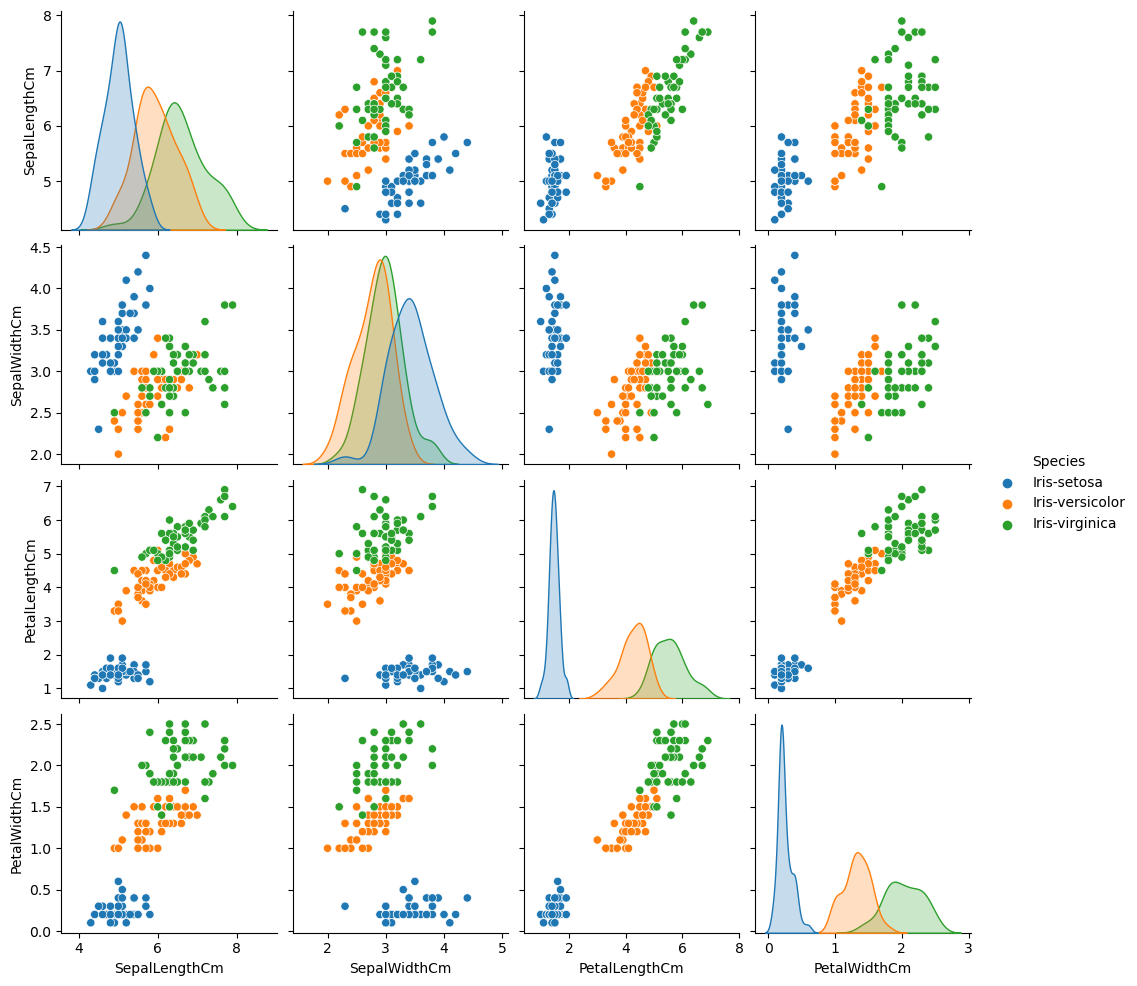

In [73]:
sns.pairplot(df, hue = "Species")

In [95]:
df_species = df.groupby("Species")[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]].mean()
df_species

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,
Iris-setosa,5.010417,3.431250,1.462500,0.250000
Iris-versicolor,5.936000,2.770000,4.260000,1.326000
Iris-virginica,6.604082,2.979592,5.561224,2.028571


<Axes: xlabel='Species'>

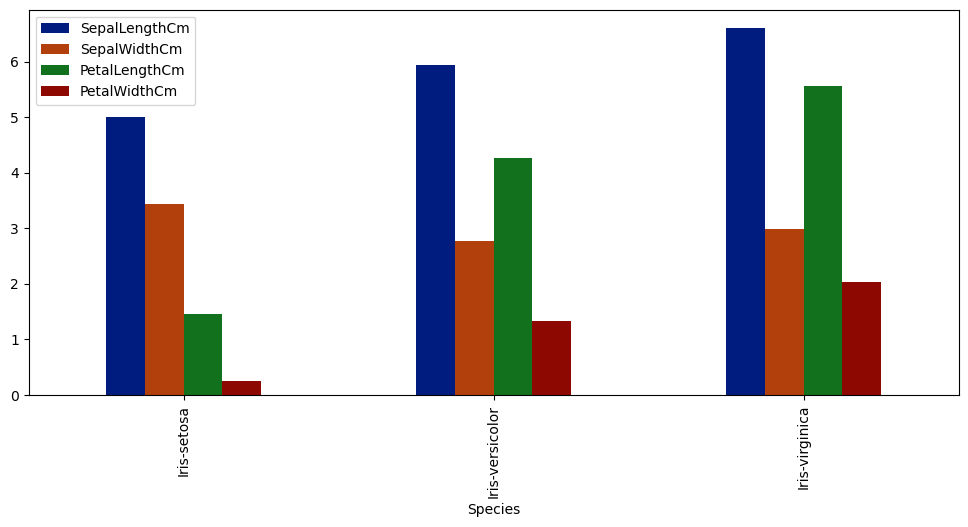

In [97]:
df_species.plot.bar(figsize = (12, 5), color = sns.color_palette("dark"))

<Axes: xlabel='SepalLengthCm', ylabel='PetalLengthCm'>

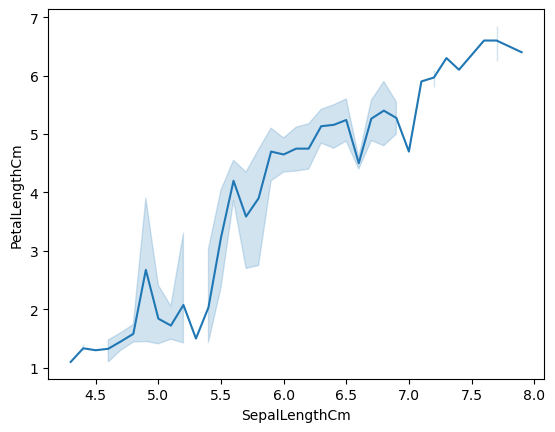

In [74]:
sns.lineplot(x = "SepalLengthCm", y = "PetalLengthCm", data = df)

Text(0.5, 1.0, 'Line Histogram')

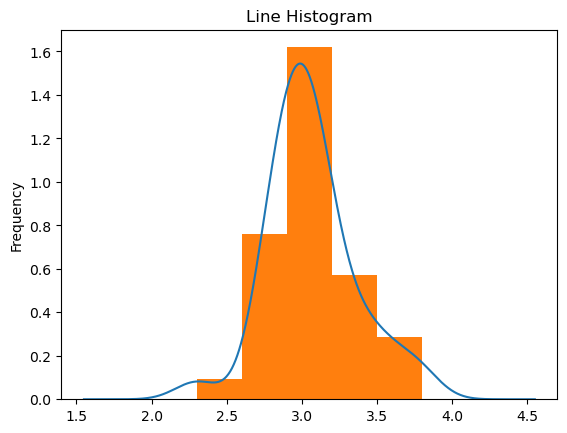

In [87]:
fig, ax = plt.subplots()
hist1 = df.groupby("SepalLengthCm")["SepalWidthCm"].agg(np.mean)
hist1.plot.kde(ax = ax) 
hist1.plot.hist(density = True, ax = ax, bins = 5)
plt.title("Line Histogram")

**-> The data is normally distributed**

Text(0, 0.5, 'Sepal Length')

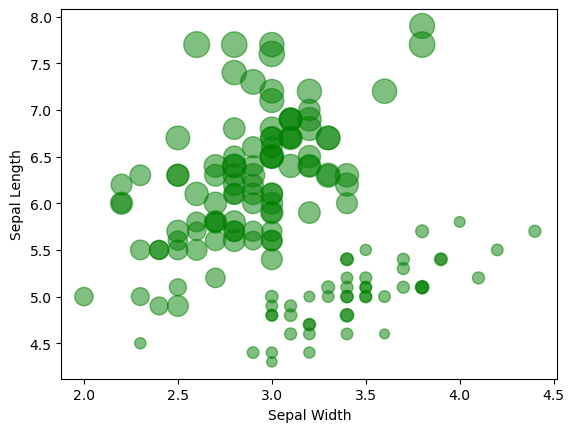

In [98]:
plt.scatter(x = df.SepalWidthCm, y = df.SepalLengthCm, s = 50*df.PetalLengthCm, alpha = 0.5, color = "green")
plt.xlabel("Sepal Width")
plt.ylabel("Sepal Length")

# Model

In [99]:
# Spliting the data into Feature matrix and Target vector 
features = df.drop("Species", axis = 1)
target = df["Species"]

In [101]:
print("Features shape is: ", features.shape)
print("Target shape is: ", target.shape)

Features shape is:  (147, 4)
Target shape is:  (147,)


In [103]:
# Spliting the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size= 0.3, random_state= 45)

print("X_train shape is:",X_train.shape)
print("y_train shape is:",y_train.shape)
print("X_test shape is:",X_test.shape)
print("y_test shape is:",y_test.shape)

X_train shape is: (102, 4)
y_train shape is: (102,)
X_test shape is: (45, 4)
y_test shape is: (45,)


## Logistic Regression Model

In [105]:
LR_model = LogisticRegression()
LR_model.fit(features, target)

LogisticRegression()

In [107]:
# Getting the accuracy of train and test data
print("Training Acuuracy is: ", round(LR_model.score(X_train, y_train), 2)*100, "%")
print("Testing Acuuracy is: ", round(LR_model.score(X_test, y_test), 2)*100, "%")

Trainning Acuuracy is:  96.0 %
Testing Acuuracy is:  100.0 %


## KNeighborsClassifier Model

In [134]:
knn_model = KNeighborsClassifier(n_neighbors= 10)
knn_model.fit(features, target)

KNeighborsClassifier(n_neighbors=10)

In [135]:
# Getting the score of train and test data
print("Training accuracy is: ", round(knn_model.score(X_train, y_train), 2)*100, "%")
print("Testing accuracy is: ", round(knn_model.score(X_test, y_test), 2)*100, "%")

Training accuracy is:  97.0 %
Testing accuracy is:  100.0 %


## Dissimilarity Matrix

In [113]:
euclidean_distance = pairwise_distances(df.drop("Species", axis = 1), metric= "euclidean")
dissimilarity_matrix = pd.DataFrame(euclidean_distance, columns= range(len(df)), index= range(len(df)))
dissimilarity_matrix.head()

,0,1,2,3,4,5,6,7,8,9,...,137,138,139,140,141,142,143,144,145,146
0,0.000000,0.538516,0.509902,0.648074,0.141421,0.616441,0.519615,0.173205,0.921954,0.469042,...,4.796874,5.019960,4.636809,5.257376,5.136146,4.654031,4.276681,4.459821,4.650806,4.140048
1,0.538516,0.000000,0.300000,0.331662,0.608276,1.090871,0.509902,0.424264,0.509902,0.173205,...,4.860041,5.072475,4.702127,5.320714,5.206726,4.700000,4.249706,4.498889,4.718050,4.153312
2,0.509902,0.300000,0.000000,0.244949,0.509902,1.086278,0.264575,0.412311,0.435890,0.316228,...,5.026927,5.228767,4.868265,5.475400,5.353504,4.864155,4.430576,4.661545,4.848711,4.298837
3,0.648074,0.331662,0.244949,0.000000,0.648074,1.166190,0.331662,0.500000,0.300000,0.316228,...,4.910193,5.104900,4.760252,5.349766,5.232590,4.745524,4.288356,4.533211,4.719110,4.149699
4,0.141421,0.608276,0.509902,0.648074,0.000000,0.616441,0.458258,0.223607,0.921954,0.529150,...,4.844585,5.061620,4.686150,5.297169,5.173007,4.701064,4.330127,4.504442,4.678675,4.173727


In [116]:
# Saving the dissimilarity matrix to a CSV file
dissimilarity_matrix.to_csv("iris_dissimilarity_matrix.csv")

## Cosine Similarity Matrix 

In [117]:
cosine_distance = pairwise_distances(df.drop("Species", axis = 1), metric = 'cosine')

cosine_dissimilarity_matrix = pd.DataFrame(cosine_distance, columns= range(len(df)), index= range(len(df)))
cosine_dissimilarity_matrix.head()

,0,1,2,3,4,5,6,7,8,9,...,137,138,139,140,141,142,143,144,145,146
0,2.220446e-16,1.420836e-03,0.000013,8.993932e-04,0.000242,0.000997,0.000920,0.000220,0.000865,0.001235,...,0.106492,0.121744,0.101473,0.124387,0.121381,0.110444,0.119100,0.108214,0.116091,0.113297
1,1.420836e-03,1.110223e-16,0.001209,1.206070e-03,0.002759,0.003074,0.003720,0.001086,0.000739,0.000348,...,0.093807,0.109221,0.089087,0.111931,0.109781,0.097767,0.104488,0.095850,0.106200,0.102126
2,1.265272e-05,1.208547e-03,0.000000,7.830166e-04,0.000332,0.000961,0.000964,0.000172,0.000717,0.001092,...,0.104634,0.119797,0.099600,0.122472,0.119482,0.108522,0.117090,0.106371,0.114331,0.111541
3,8.993932e-04,1.206070e-03,0.000783,1.110223e-16,0.001283,0.000865,0.001304,0.000231,0.000061,0.000614,...,0.089733,0.104040,0.085714,0.106114,0.103760,0.093828,0.101420,0.091231,0.098765,0.095558
4,2.423233e-04,2.759204e-03,0.000332,1.282958e-03,0.000000,0.000700,0.000397,0.000535,0.001470,0.002247,...,0.109453,0.124403,0.104496,0.126901,0.123621,0.113415,0.122762,0.110976,0.117599,0.115342


In [118]:
# Saving the similarity matrix to a CSV file
cosine_dissimilarity_matrix.to_csv("cosine_dissimilarity_matrix.csv")